In [1]:
import numpy as np
import matplotlib.pyplot as plt
from KO_PDE_FIND import *
from sklearn.linear_model import Ridge, RidgeCV


Using the data from the numerical solution of the FPE for the coherence state ($\sigma = \{(-,+),(+,-)\}$), we are going to using PDE-FIND algorithm to recover the governing equation

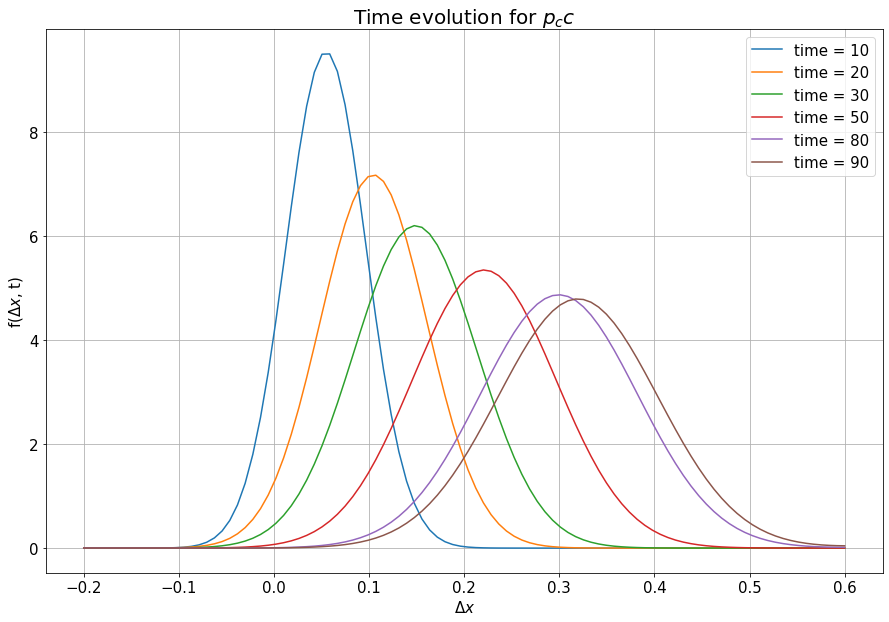

In [26]:
# Load the data from the Data folder

Pt = np.load('../Data/inter_sister_distance_FPE_cc.npy')
# Visualization
x = np.linspace(-0.2,0.6,100)
time = [10,20,30,50,80,90] 
plt.figure(figsize=(15,10))

for t in time:
    plt.plot(x,Pt[t],label='time = {}'.format(t))
plt.grid('on')    
#plt.plot(x,res.data,label='time = {}'.format(len(storage.data)))
plt.legend(fontsize=15)
plt.title('Time evolution for $p_cc$', fontsize=20)
plt.xlabel('$\Delta x$', fontsize=15);plt.ylabel('f($\Delta x$, t)', fontsize=15)
plt.xticks(fontsize=15);plt.yticks(fontsize=15)
#plt.savefig('../Plots/fpep--.png')
plt.show()

# Build the library

In [5]:
# Ut,R,rhs_des = build_linear_system(Pt, dt=5, dx=3, D=3, P=2, time_diff = 'FD', space_diff='FD', deg_x = 2, deg_t=5)


# Redefine the library to conserve FPE

time,space  = Pt.shape 
x = np.linspace(-0.2,0.6,100) # range of Δ𝑥
rhs_desc = ['','p','p_{x}','xp_{x}','p_{xx}']#,x',,'xp_{xx}','x^2'
trim = x[10:-10] # Poly interpolation trims of 30 boundary points while using build_linear_system function
trim_x = np.tile(trim,521)


col_x = np.tile(x,time) # unroll x into a column vector
col_1 = R[:,0] # column of 1s
col_p = R[:,1] # column of p
col_p_x = R[:,3] # column of p_xx
col_xp_x = np.multiply(col_x,col_p_x) # column xp_x
col_p_xx = R[:,6]
col_xp_xx = np.multiply(col_x,col_p_xx)
col_x2 = np.power(col_x,2)
Theta = np.column_stack((col_1,col_p,col_p_x,col_xp_x, col_p_xx))#,col_x2,,col_xp_x,

Theta.shape

#EQL using STRidge
lam = 10**-5
d_tol = 5
rhs_desc
w=TrainSTRidge(Theta.real,Ut.real,10**2,10,maxit=25,STR_iters=10,print_best_tol=True,normalize=2)
print_pde(w,rhs_desc)

Optimal tolerance: 0
u_t = (0.044863 +0.000000i)
    + (0.005495 +0.000000i)p
    + (-0.092792 +0.000000i)p_{x}
    + (0.304791 +0.000000i)xp_{x}
    + (0.099403 +0.000000i)p_{xx}
   


In [23]:
w=TrainSTRidge(Theta,Ut,10**-1,10,maxit=25,STR_iters=10,print_best_tol=True,normalize=2,l0_penalty=0.75)
print_pde(w,rhs_desc)

Optimal tolerance: 40.793650793650734
u_t = (0.005704 +0.000000i)p
   


In [ ]:
np.linalg.cond(R)

In [ ]:
np.linalg.lstsq

In [29]:
rhs_desc

['', 'p', 'p_{x}', 'xp_{x}', 'p_{xx}']

In [21]:
Ut,R,rhs_des = build_linear_system(Pt, dt=5, dx=3, D=2, P=1, time_diff = 'FD', space_diff='FD', deg_x = 2, deg_t=5)
w=TrainSTRidge(R,Ut,10**-6,12)
print_pde(w,rhs_des)

u_t = (0.006418 +0.000000i)
    + (0.012658 +0.000000i)u
    + (0.068424 +0.000000i)u_{x}
    + (-0.009674 +0.000000i)uu_{x}
    + (0.464479 +0.000000i)u_{xx}
    + (-0.030633 +0.000000i)uu_{xx}
   


In [20]:
rhs_des

['', 'u', 'u_{x}', 'uu_{x}', 'u_{xx}', 'uu_{xx}']

In [4]:
rhs_desc

['', 'p', 'p_{x}', 'xp_{x}', 'p_{xx}']

In [14]:
def split_data(R,Ut,split=.8):
    
    # Split data into 80% training and 20% test, then search for the best tolderance.
    np.random.seed(0) # for consistancy
    n,_ = R.shape
    train = np.random.choice(n, int(n*split), replace = False)
    test = [i for i in np.arange(n) if i not in train]
    TrainR = R[train,:]
    TestR = R[test,:]
    TrainY = Ut[train,:]
    TestY = Ut[test,:]
    D = TrainR.shape[1]
    
    return TrainR, TestR, TrainY, TestY